In [1]:
from stock import* 
import numpy as np
import akshare as ak
import pandas as pd

In [2]:
import numpy as np
stock_list=["sz002594","sh603517","sh600031",
            "sz000858","sh603816","sh600690",
            "sh600519","sz002493","sh601318",
            "sz000895","sz002415","sh601021",
            "sz000333","sz300413","sz002332"]
day=70
ExpReturn=[]
ExpCov=[]
for s in stock_list:
    data = ak.stock_zh_a_daily(symbol=s, adjust="qfq")
    k=stock(data,s,day)
    ExpReturn.append(k.ExpReturn2())
    ExpCov.append(k.His_Return())
ExpReturn=np.array(ExpReturn)
ExpCov=np.array(ExpCov)
ExpCov=np.cov(ExpCov)
ExpCov

array([[ 8.67572441e-04,  1.92238259e-04,  2.70092722e-04,
         2.86229918e-04,  2.53122677e-04,  6.28258936e-05,
         2.10812307e-04,  2.51922122e-04,  1.57749597e-04,
         6.64603243e-05,  1.62900684e-04,  1.91025237e-04,
         1.39900586e-04,  1.85413105e-04,  1.78815351e-04],
       [ 1.92238259e-04,  7.38469439e-04,  1.67091939e-04,
         2.92273561e-04,  2.13992353e-04,  1.84830871e-05,
         2.13792644e-04,  1.46702018e-04,  9.98627593e-05,
         8.56908676e-05,  4.31253317e-05,  1.52547670e-04,
         7.53261885e-05,  1.24213417e-04,  2.05947632e-04],
       [ 2.70092722e-04,  1.67091939e-04,  5.74792804e-04,
         2.58914286e-04,  2.11029591e-04,  6.71339134e-05,
         1.96756645e-04,  2.42889427e-04,  1.90401227e-04,
         9.69950452e-05,  1.25323386e-04,  1.77804547e-04,
         1.46896621e-04,  1.51688911e-04,  1.74716478e-04],
       [ 2.86229918e-04,  2.92273561e-04,  2.58914286e-04,
         6.53756728e-04,  2.75771436e-04,  6.76531044

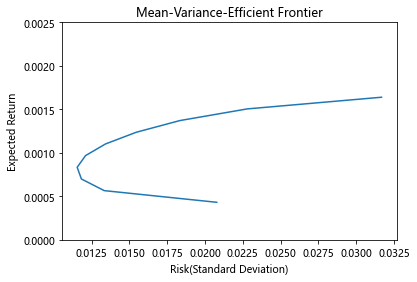

In [3]:
[target_variance, target_returns, PortWts]=frontcon(ExpReturn, ExpCov)
plt.plot(target_variance, target_returns)
plt.ylim(0,0.0025)
plt.title("Mean-Variance-Efficient Frontier")
plt.xlabel("Risk(Standard Deviation)")
plt.ylabel("Expected Return")
plt.show()

In [5]:
plan(stock_list,PortWts[8],140989.23).perchase_plan()

股票sz002594购买0股
股票sh603517购买0股
股票sh600031购买0股
股票sz000858购买0股
股票sh603816购买0股
股票sh600690购买0股
股票sh600519购买0股
股票sz002493购买0股
股票sh601318购买0股
股票sz000895购买1200股
股票sz002415购买0股
股票sh601021购买0股
股票sz000333购买0股
股票sz300413购买1400股
股票sz002332购买0股
